In [1]:
import glacierml as gl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
pd.set_option('display.max_columns', None)


In [2]:
df, ref = gl.notebook_data_loader()

Global Volume: 101.48, UB: 39.16, LB: 42.34, STD: 42.19


In [3]:
ref

,RGIId,Farinotti Mean Thickness,region_x,Unnamed: 0,Edasi Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates,region_y,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,UB,LB,Edasi Volume,Volume Std Dev,Farinotti Volume,region,VE / VF
0,RGI60-01.00001,21.182035,01,0,13.043935,12.215585,7.185912,0.959877,3.112729e-31,8.811783,6.398729,-6.462088,12.215585,3811.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,-0.002326,0.002304,0.004696,0.002587,0.007626,01,0.615802
1,RGI60-01.00002,30.519478,01,1,41.069587,40.924946,6.822120,0.990253,1.586008e-15,8.421796,34.725165,-34.897340,40.924946,3811.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,-0.019473,0.019377,0.022917,0.003807,0.017030,01,1.345684
2,RGI60-01.00003,35.518610,01,2,38.734646,38.294230,6.387004,0.985491,2.359999e-19,7.642468,32.865929,-32.920920,38.294230,3811.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,-0.055472,0.055379,0.065268,0.010762,0.059849,01,1.090545
3,RGI60-01.00004,53.077263,01,3,48.341164,48.401844,6.664440,0.992035,9.277021e-14,8.204750,42.152524,-42.242080,48.401844,3811.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,-0.155493,0.155163,0.177944,0.024532,0.195377,01,0.910770
4,RGI60-01.00005,47.519207,01,4,50.408669,50.637730,7.680643,0.994742,1.710968e-10,9.579536,43.270395,-43.130172,50.637730,3811.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,-0.110974,0.111335,0.129702,0.019762,0.122267,01,1.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,216454,23.073072,21.131971,12.320230,0.952595,1.809056e-33,15.817495,11.398464,-11.239645,21.131971,3811.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,-0.000472,0.000479,0.000969,0.000517,0.000544,19,1.781978
215483,RGI60-19.02749,22.894110,19,216455,32.247384,31.084797,13.478007,0.979685,5.959069e-23,17.621284,19.208433,-19.520880,31.084797,3811.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,-0.011068,0.010891,0.018284,0.007642,0.012981,19,1.408545
215484,RGI60-19.02750,60.874610,19,216456,67.579777,66.979240,19.660263,0.996177,2.526786e-08,26.098211,48.206098,-48.604027,66.979240,3811.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,-0.200151,0.198513,0.278294,0.080961,0.250682,19,1.110147
215485,RGI60-19.02751,10.053704,19,216457,89.611930,88.118710,24.154719,0.994578,1.020097e-10,32.162770,66.169986,-65.570044,88.118710,3811.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,-0.000721,0.000728,0.000986,0.000266,0.000111,19,8.913325


In [4]:
data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
vol_f = data_1

data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']
vol_e = data_2

print('Sorting data...')
x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

print('Calculating point density...')
# Calculate the point density
xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

z = gaussian_kde(xy)(xy)

bins_x = np.logspace(np.log10(np.min(vol_f)), np.log10(np.max(vol_f)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e)), np.log10(np.max(vol_e)), 25)

Sorting data...
Calculating point density...


Drawing scatter plot...
Drawing done
Setting scales and labels...
Saving....


<function matplotlib.pyplot.show(close=None, block=None)>

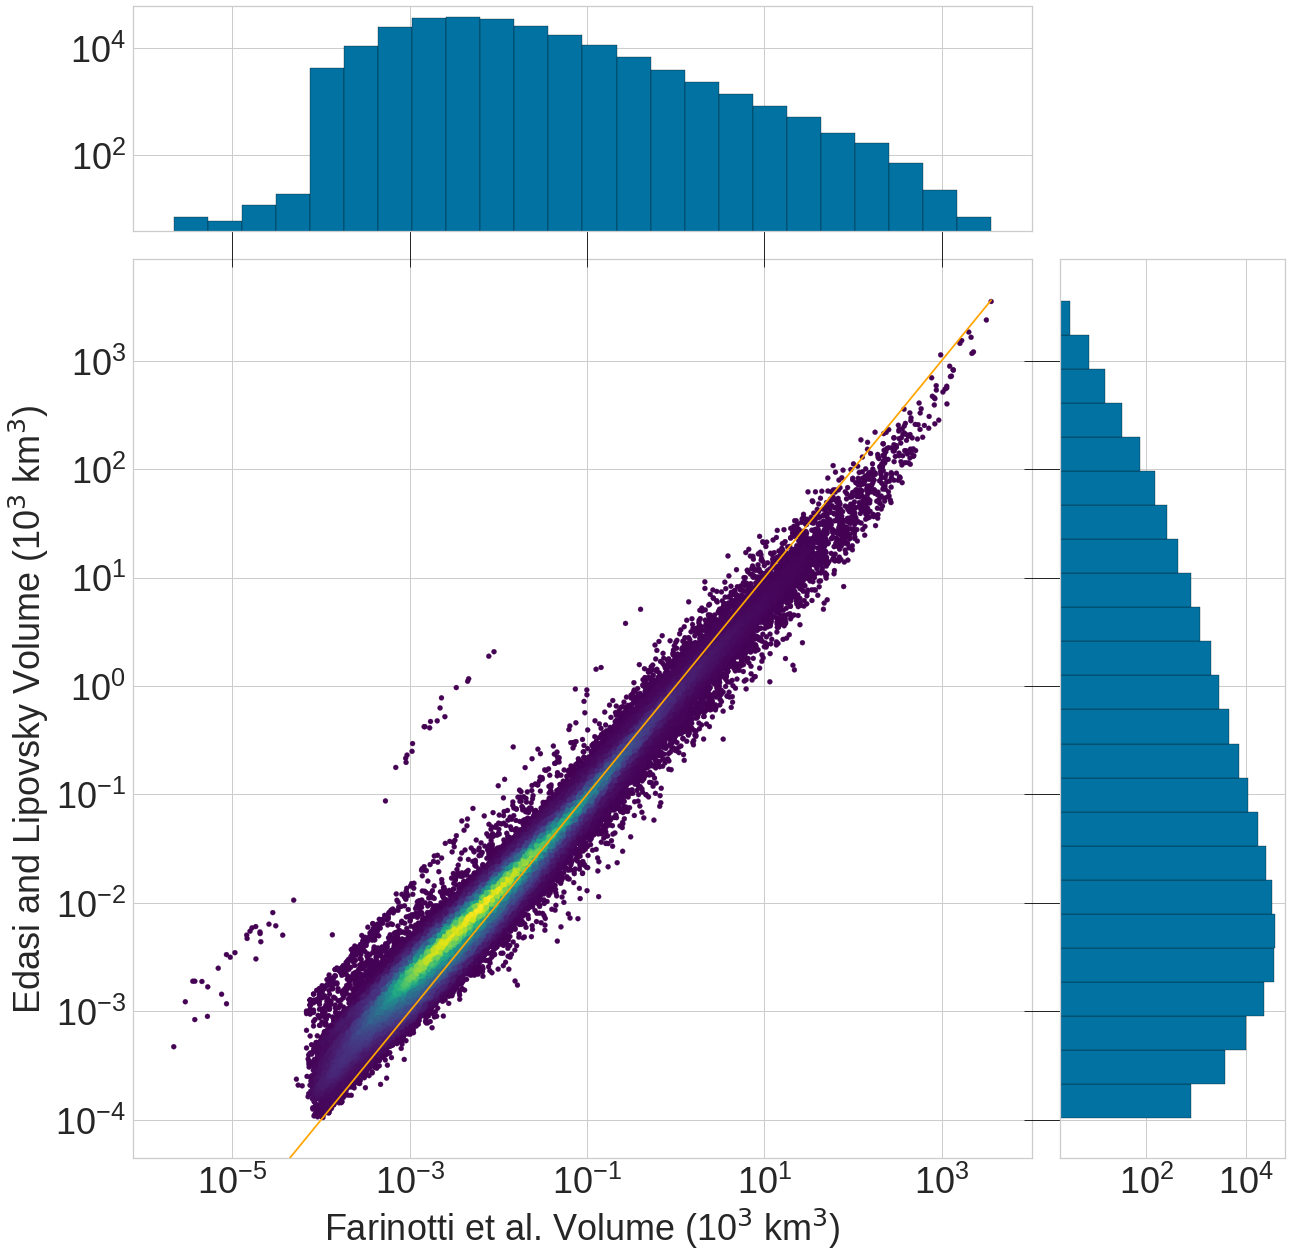

In [5]:
from matplotlib import ticker

def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 36)
    ax_histy.tick_params(axis="y", labelleft=False, size = 36)

    # the scatter plot:
    ax.scatter(vol_f, vol_e, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.'
              )
    ax.plot(
        (0,(ref['Farinotti Volume'].max())),
        (0,ref['Farinotti Volume'].max()),
        '-',
        c = 'orange'

    )
    ax_histx.hist(
        (vol_f), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )
    
    ax_histy.hist(
        (vol_e), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=36)
    ax_histy.tick_params(axis="y", labelsize=36)

    
fig = plt.figure(figsize=(20,20))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=36)
ax_histy.tick_params(axis="x", labelsize=36)

ax.tick_params(axis="both", labelsize=36)


# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    vol_f, 
    vol_e,
    ax, 
    ax_histx,
    ax_histy,
)

print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi and Lipovsky Volume (10$^3$ km$^3$)', fontsize = 36)
ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)', fontsize = 36)


print('Saving....')
plt.show
# plt.savefig('figs/scatter/scatter_hist_df8.eps')
# plt.savefig('figs/scatter/scatter_hist_df8.svg')
# plt.savefig('figs/scatter/scatter_hist_df8.png')
# plt.savefig('figs/scatter/test.svg')
